In [1]:
import MT as mt

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def vb_model(c,theta):
    A,B,C,K = theta
    #return -c[0]*np.sin(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+v_LSR[0]*np.sin(c[2])*np.cos(c[1])+v_LSR[1]*np.sin(c[2])*np.sin(c[1])
    return -c[0]*np.sin(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+mvz1(c[0]*np.sin(c[2]))*np.cos(c[2])
def vell_model(c,theta):
    A,B,C,K = theta
    #return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])-C*np.sin(2*c[1]))-v_LSR[0]*np.sin(c[1])-v_LSR[1]*np.cos(c[1])
    return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])-C*np.sin(2*c[1]))

def vr_model(c,theta):
    A,B,C,K = theta
    #return c[0]*np.cos(c[2])*(B+A*np.cos(2*c[1])-C*np.sin(2*c[1]))-v_LSR[0]*np.sin(c[1])-v_LSR[1]*np.cos(c[1])
    return c[0]*np.cos(c[2])*np.cos(c[2])*(K+C*np.cos(2*c[1])+A*np.sin(2*c[1]))+mvz1(c[0]*np.sin(c[2]))*np.sin(c[2])

def cart2galactic(coord,coord_sun):
    zh = np.array([0.,0.,1.])
    Xh_new = -coord_sun/np.linalg.norm(coord_sun)
    Yh_new = np.cross(zh,Xh_new)
    dr = coord-coord_sun
    drn = np.linalg.norm(dr)
    ell = np.arctan2(Yh_new.dot(dr),Xh_new.dot(dr))
    b = np.arcsin((coord[2]-coord_sun[2])/drn)
    return np.array([drn,ell,b])

def vcart2vgalactic(coord,coord_sun,vel,vel_sun):
    zh = np.array([0.,0.,1.])
    Xh_new = -coord_sun/np.linalg.norm(coord_sun)
    Yh_new = np.cross(zh,Xh_new)
    
    dv = (vel-vel_sun)
    #dv = vel
    dr = (coord-coord_sun)
    v_r = dv.dot(dr)/np.linalg.norm(dr)
    v_ell = dv.dot(np.array([-dr[1],dr[0],0]))/np.linalg.norm([-dr[1],dr[0],0])
    v_b = dv.dot( np.array([-dr[0]*dr[2],dr[1]*dr[2],dr[0]**2+dr[1]**2]) )/np.linalg.norm(dr)/np.linalg.norm([dr[0],dr[1],0])
    return np.array([v_r, v_ell, v_b])

In [7]:
def Rot_mat(alpha, axis):
    axis = np.array(axis)/np.linalg.norm(axis)
    R = np.array([[np.cos(alpha)+axis[0]**2*(1-np.cos(alpha)), axis[0]*axis[1]*(1-np.cos(alpha))-axis[2]*np.sin(alpha), axis[0]*axis[2]*(1-np.cos(alpha))+axis[1]*np.sin(alpha)],\
          [axis[0]*axis[1]*(1-np.cos(alpha))+axis[2]*np.sin(alpha), np.cos(alpha)+axis[1]**2*(1-np.cos(alpha)), axis[1]*axis[2]*(1-np.cos(alpha))-axis[0]*np.sin(alpha)],\
          [axis[0]*axis[2]*(1-np.cos(alpha))-axis[1]*np.sin(alpha), axis[1]*axis[2]*(1-np.cos(alpha))+axis[0]*np.sin(alpha), np.cos(alpha)+axis[2]**2*(1-np.cos(alpha))] \
         ])
    return R

In [8]:
def m1_coord(N,r): #Modelo 1: circunferencia a z=0 con velocidad circular. Genero \ell aleaotorios
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    xx = r*np.cos(ll)
    yy = r*np.sin(ll)
    zz = np.zeros(N)
    return np.array([xx, yy, zz])

In [9]:
def m2_coord(N,rmin,rmax): #Modelo 2: circunferencia con grosor a z=0 con velocidad circular. Genero \ell y r en un intervalo aleaotorios
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    rr = np.random.rand(N)*(rmax-rmin)+rmin
    xx = rr*np.cos(ll)
    yy = rr*np.sin(ll)
    zz = np.zeros(N)
    return np.array([xx, yy, zz])

def m2bis_coord(N,r,amin,amax): #Modelo 2b: circunferencia con grosor transversal a z=0 con velocidad circular. Genero \ell y r en un intervalo aleaotorios
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    zz = np.random.rand(N)*(amax-amin)+amin
    xx = r*np.cos(ll)
    yy = r*np.sin(ll)
    return np.array([xx, yy, zz])

In [10]:
def m3_coord(N,r,i,vnod): #Modelo 3: circunferencia con una inclinacion i respecto al plano xy y direccion de los nodos dada por el vector vnod.
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    xx = r*np.cos(ll)
    yy = r*np.sin(ll)
    zz = np.zeros(N)
    xyz = np.array([xx, yy, zz]).T
    Mrot = Rot_mat(i,vnod)
    xyz = np.array([Mrot.dot(c) for c in xyz]).T
    return xyz

In [11]:
def m4_coord(N,rmin,rmax,i,vnod): #Modelo 4: circunferencia con ancho con una inclinacion i respecto al plano xy y direccion de los nodos dada por el vector vnod.
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    rr = np.random.rand(N)*(rmax-rmin)+rmin
    xx = rr*np.cos(ll)
    yy = rr*np.sin(ll)
    zz = np.zeros(N)
    xyz = np.array([xx, yy, zz]).T
    Mrot = Rot_mat(i,vnod)
    xyz = np.array([Mrot.dot(c) for c in xyz]).T
    return xyz

def m4bis_coord(N,r,amin,amax,i,vnod): #Modelo 4b: circunferencia con grosor transversal con una inclinacion i respecto al plano xy y direccion de los nodos dada por el vector vnod.
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    zz = np.random.rand(N)*(amax-amin)+amin
    xx = r*np.cos(ll)
    yy = r*np.sin(ll)
    xyz = np.array([xx, yy, zz]).T
    Mrot = Rot_mat(i,vnod)
    xyz = np.array([Mrot.dot(c) for c in xyz]).T
    return xyz

In [12]:
def m5bis_coord(N,r,rint,i,vnod): #Modelo 5: Toro circular con una inclinacion i respecto al plano xy y direccion de los nodos dada por el vector vnod.
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    rr = np.random.rand(N)*rint
    aa1 = np.random.rand(N)*2*np.pi-np.pi
    aa2 = np.random.rand(N)*np.pi
    xx = r*np.cos(ll)+rr*np.cos(aa2)*np.cos(aa1)
    yy = r*np.sin(ll)+rr*np.cos(aa2)*np.sin(aa1)
    zz = rr*np.sin(aa2)
    xyz = np.array([xx, yy, zz]).T
    Mrot = Rot_mat(i,vnod)
    xyz = np.array([Mrot.dot(c) for c in xyz]).T
    return xyz

def m5_coord(N,r,rint,i,vnod): #Modelo 5: Toro circular con una inclinacion i respecto al plano xy y direccion de los nodos dada por el vector vnod.
    
    ll = np.random.rand(N)*2*np.pi-np.pi
    rr = np.random.rand(N)*rint
    aa1 = np.random.rand(N)*2*np.pi-np.pi
    xx = (r+rr*np.cos(aa1))*np.cos(ll)
    yy = (r+rr*np.cos(aa1))*np.sin(ll)
    zz = rr*np.sin(aa1)
    xyz = np.array([xx, yy, zz]).T
    Mrot = Rot_mat(i,vnod)
    xyz = np.array([Mrot.dot(c) for c in xyz]).T
    return xyz

In [13]:
def mvz1(cz, vz_max = .2):
    hz = .5
    if abs(cz) > hz:
        return -vz_max*cz/abs(cz)
    return -vz_max*cz/hz

In [14]:
def m1_vels(coords,vz_dist = mvz1):
    kpc2km = mt.C.kpc.express(mt.C.km)
    #return np.array([np.append(mt.vel_circ(c,mt.force_T)[:2]*kpc2km,vz_dist(c[2])) for c in coords.T]).T
    #return np.array([np.append(mt.vel_circ(c,mt.force_T)[:2],vz_dist(c[2])/kpc2km) for c in coords.T]).T
    return np.array([mt.vel_circ(c,mt.force_T) for c in coords.T]).T

In [15]:
h = 52908836701422.07/100

In [16]:
m3 = ((m3_coord(100,.5,0.,[0,2,0]).T)+[8.5,0.,0.]).T

In [17]:
vv = m1_vels(m3,mvz1).T
cc = m3.T

In [18]:
ee = [np.array([cc,vv])]
for j in range(1):
    ee.append(np.array([[np.array(mt.RK4(ee[j][0][i], ee[j][1][i],h)[0]) for i in range(len(cc))],[np.array(mt.RK4(ee[j][0][i], ee[j][1][i],h)[1]) for i in range(len(cc))]]))
    

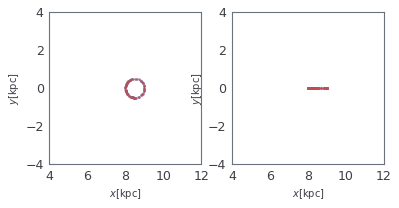

In [19]:
tci = 0
tc = 1
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(ee[tci][0].T[0],\
           ee[tci][0].T[1],\
           s=4, alpha=.5)
ax.scatter(ee[tc][0].T[0],\
           ee[tc][0].T[1],\
           s=4, alpha=.5,c='r')
ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
#ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
ax.set_aspect('equal')
ax.set_xlim(4,12)
#ax.set_xlim(-2,2)
ax.set_ylim(-4,4)
#ax.set_zlim(-2,2)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(ee[tci][0].T[0],\
           ee[tci][0].T[2],\
           s=4, alpha=.5)
ax.scatter(ee[tc][0].T[0],\
           ee[tc][0].T[2],\
           s=4, alpha=.5,c='r')
ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
#ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
ax.set_aspect('equal')
ax.set_xlim(4,12)
#ax.set_xlim(-2,2)
ax.set_ylim(-4,4)
#ax.set_zlim(-2,2)


plt.show()

____________

In [20]:
def log_likelihood(theta, coords, vels):
    #A,B,C,K = theta
    vreq = [vr_model(c,theta) for c in coords]
    velleq = [vell_model(c,theta) for c in coords]
    vbeq = [vb_model(c,theta) for c in coords]
    vvr = np.array([v[0] for v in vels])
    vvell = np.array([v[1] for v in vels])
    vvb = np.array([v[2] for v in vels])
    
    #return -0.5 * np.sum(np.sqrt((vvr - vreq)** 2) + np.sqrt((vvell - velleq)** 2) + np.sqrt((vvb - vbeq)** 2) )
    return -0.5 * np.sum(np.sqrt((vvr - vreq)** 2) + np.sqrt((vvell - velleq)** 2) )

In [21]:
def log_prior(theta):
    A,B,C,K = theta
    if -20.0 < A < 20 and -20 < B < 20.0 and -20.0 < C < 20.0 and -20.<K<20.:
        return 0.0
    return -np.inf
    #return 0.0

In [22]:
def log_probability(theta, coords, vels):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, coords, vels)

In [23]:
from scipy.optimize import minimize

In [24]:
import emcee as mc

In [25]:
import sys
sys.path.append("/fs/nas14/other0/cbenitez/Pkgs/")
import corner

______________

In [26]:
def rut_exp(v_exp, Npart=1000, inc=.17, vec_nod=[0,2,0], rc = 8.0):

    rc = rc
    m3 = ((m3_coord(Npart,1.,inc,vec_nod).T)+[rc,0.,0.]).T
    vv = m1_vels(m3,mvz1).T
    cc = m3.T

    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(cc.T[0],\
               cc.T[1],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)

    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(cc.T[0],\
               cc.T[2],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)
    plt.show()

    r_LSR = np.array([rc,0.,0.])
    v_LSR = mt.vel_circ(r_LSR,mt.force_T,)*mt.C.kpc.express(mt.C.km)

    vvkm = vv*mt.C.kpc.express(mt.C.km)
    
    #vvkm = [v+np.array([1,1])*v_exp for v in vvkm]
    
    vv_galac = np.array([vcart2vgalactic(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([cart2galactic(c,r_LSR) for c in cc])

    vv_galac = [v+np.array([v_exp,0.,0.]) for v in vv_galac]

    np.random.seed(42)
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([0.,0.,0.,0.])
    soln = minimize(nll, initial,method = 'Nelder-Mead', args=(cc_galac, vv_galac))

    pos = soln.x + 1e-4 * np.random.randn(30, 4)
    nwalkers, ndim = pos.shape

    sampler = mc.EnsembleSampler(nwalkers, ndim, log_probability, args=(cc_galac, vv_galac))
    sampler.run_mcmc(pos, 500,progress=True);

    fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["A", "B", "C",'K']
    for i in range(4):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("Pasos");

    flat_samples = sampler.get_chain(discard=50, thin=15, flat=True)

    fig = corner.corner(
        flat_samples,  labels=labels
    );

    mcmc = [np.percentile(flat_samples[:, i], [16, 50, 84]) for i in range(ndim)]
    qq = [np.diff(mcmc[i]) for i in range(ndim)]
    theta_f = [par[1] for par in mcmc]

    print "[A, B, C, D]:",theta_f 

    ll = np.linspace(-np.pi,np.pi,500)

    fig, axs = plt.subplots(3, 1, sharex=True,figsize=(9,9))
    fig.subplots_adjust(hspace=0)

    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(.35) for c in [np.array([1.,l,.35]) for l in ll]])
    axs[1].plot(ll,[vell_model(c,theta_f)/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
    axs[1].scatter([c[1] for c in cc_galac],[vv_galac[i][1]/cc_galac[i][0]/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[2].plot(ll,[vb_model(c,theta_f)/1./np.cos(.17)/np.sin(.17) for c in [np.array([1.,l,.17]) for l in ll]])
    axs[2].scatter([c[1] for c in cc_galac],[vv_galac[i][2]/cc_galac[i][0]/np.sin(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[0].plot(ll,[vr_model(c,theta_f)/1./np.cos(.17)/np.cos(.17) for c in [np.array([1.,l,.17]) for l in ll]])
    axs[0].scatter([c[1] for c in cc_galac],[vv_galac[i][0]/cc_galac[i][0]/np.cos(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)


    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    plt.xlabel(r'$\ell$',fontsize=14)
    axs[0].set_ylabel(r'$\frac{v_{r}}{r\cos^2{b}}$',fontsize=14)
    axs[1].set_ylabel(r'$\frac{v_{\ell}}{r\cos{b}}$',fontsize=14)
    axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=14)
    plt.show()

    return cc, vv, cc_galac, vv_galac, soln, mcmc, qq, theta_f, sampler

In [29]:
def rut_rot(v_rot, Npart=1000, Ncam=2000, inc=.17, vec_nod=[0,2,0], rc = 8.0):

    rc = rc
    m3 = ((m3_coord(Npart,1.,inc,vec_nod).T)+[rc,0.,0.]).T
    vv = m1_vels(m3,mvz1).T
    cc = m3.T

    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(cc.T[0],\
               cc.T[1],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)

    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(cc.T[0],\
               cc.T[2],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)
    plt.show()

    r_LSR = np.array([rc,0.,0.])
    v_LSR = mt.vel_circ(r_LSR,mt.force_T,)*mt.C.kpc.express(mt.C.km)

    vvkm = vv*mt.C.kpc.express(mt.C.km)
    
    #vvkm = [v+np.array([1,1])*v_exp for v in vvkm]
    
    vv_galac = np.array([vcart2vgalactic(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([cart2galactic(c,r_LSR) for c in cc])

    vv_galac = [v+np.array([0.,v_rot,0.]) for v in vv_galac]

    np.random.seed(42)
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([0.,0.,0.,0.])
    soln = minimize(nll, initial,method = 'Nelder-Mead', args=(cc_galac, vv_galac))

    pos = soln.x + 1e-4 * np.random.randn(30, 4)
    nwalkers, ndim = pos.shape

    sampler = mc.EnsembleSampler(nwalkers, ndim, log_probability, args=(cc_galac, vv_galac))
    sampler.run_mcmc(pos, 500,progress=True);

    fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["A", "B", "C",'K']
    for i in range(4):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("Pasos");

    flat_samples = sampler.get_chain(discard=50, thin=15, flat=True)

    fig = corner.corner(
        flat_samples,  labels=labels
    );

    mcmc = [np.percentile(flat_samples[:, i], [16, 50, 84]) for i in range(ndim)]
    qq = [np.diff(mcmc[i]) for i in range(ndim)]
    theta_f = [par[1] for par in mcmc]

    print "[A, B, C, D]:",theta_f 

    ll = np.linspace(-np.pi,np.pi,500)

    fig, axs = plt.subplots(3, 1, sharex=True,figsize=(9,9))
    fig.subplots_adjust(hspace=0)

    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(.35) for c in [np.array([1.,l,.35]) for l in ll]])
    axs[1].plot(ll,[vell_model(c,theta_f)/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
    axs[1].scatter([c[1] for c in cc_galac],[vv_galac[i][1]/cc_galac[i][0]/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[2].plot(ll,[vb_model(c,theta_f)/1./np.cos(.17)/np.sin(.17) for c in [np.array([1.,l,.17]) for l in ll]])
    axs[2].scatter([c[1] for c in cc_galac],[vv_galac[i][2]/cc_galac[i][0]/np.sin(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[0].plot(ll,[vr_model(c,theta_f)/1./np.cos(.17)/np.cos(.17) for c in [np.array([1.,l,.17]) for l in ll]])
    axs[0].scatter([c[1] for c in cc_galac],[vv_galac[i][0]/cc_galac[i][0]/np.cos(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)


    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    plt.xlabel(r'$\ell$',fontsize=14)
    axs[0].set_ylabel(r'$\frac{v_{r}}{r\cos^2{b}}$',fontsize=14)
    axs[1].set_ylabel(r'$\frac{v_{\ell}}{r\cos{b}}$',fontsize=14)
    axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=14)
    plt.show()

    return cc, vv, cc_galac, vv_galac, soln, mcmc, qq, theta_f, sampler

______

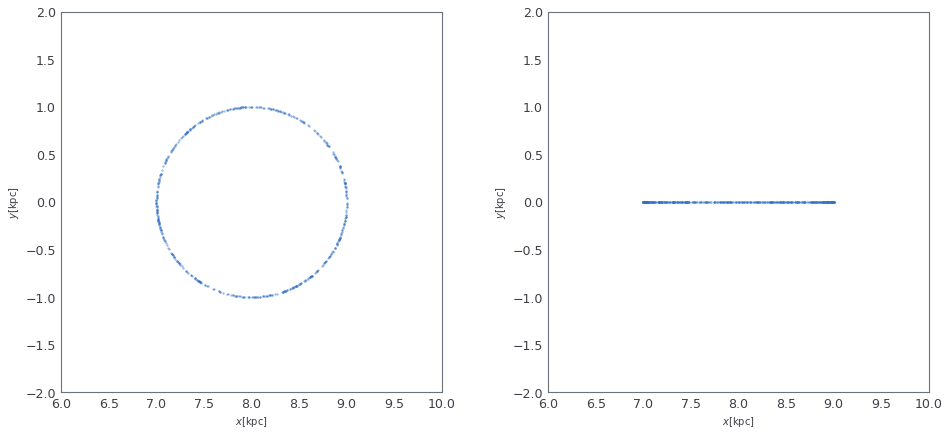

100%|██████████| 500/500 [03:24<00:00,  2.47it/s]


[A, B, C, D]: [13.358585477837329, -18.073786504452492, 0.3908656232525126, -0.04496369687010962]


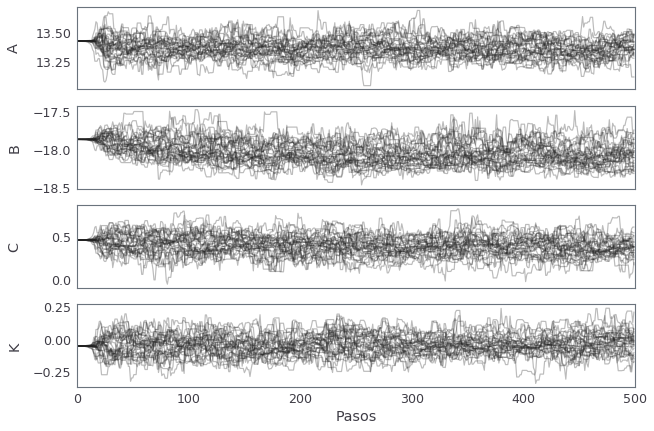

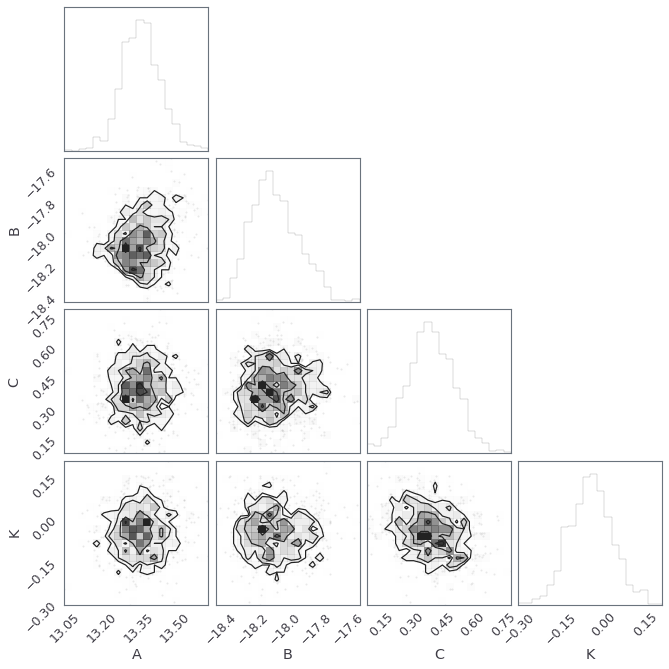

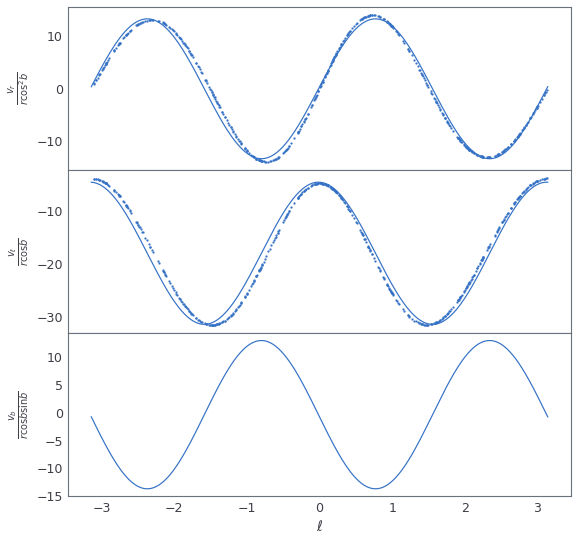

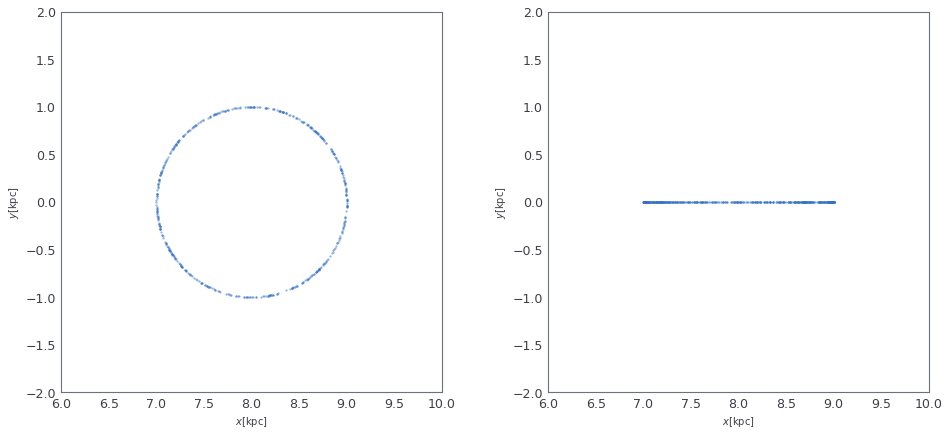

100%|██████████| 500/500 [03:25<00:00,  2.44it/s]


[A, B, C, D]: [13.364245006114956, -16.983936909885312, -0.18643645761366334, 0.0614820761902117]


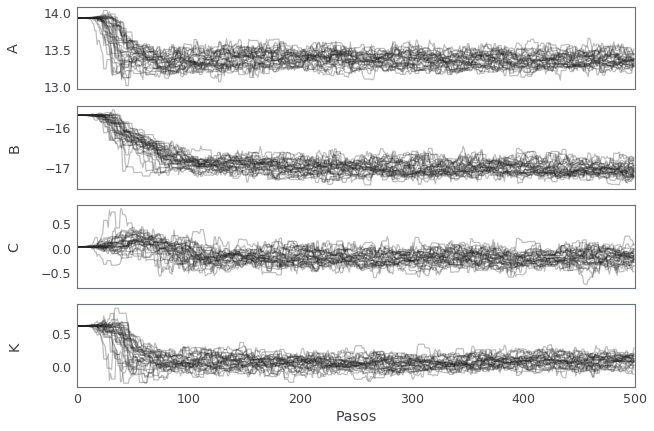

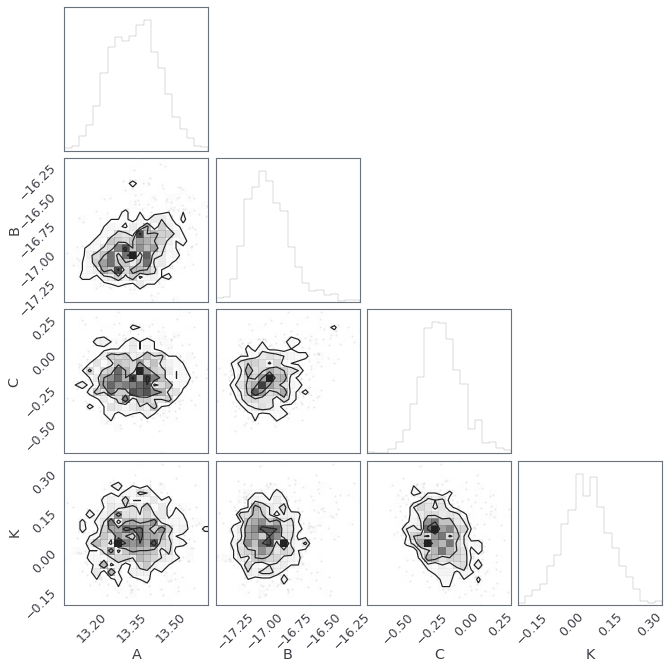

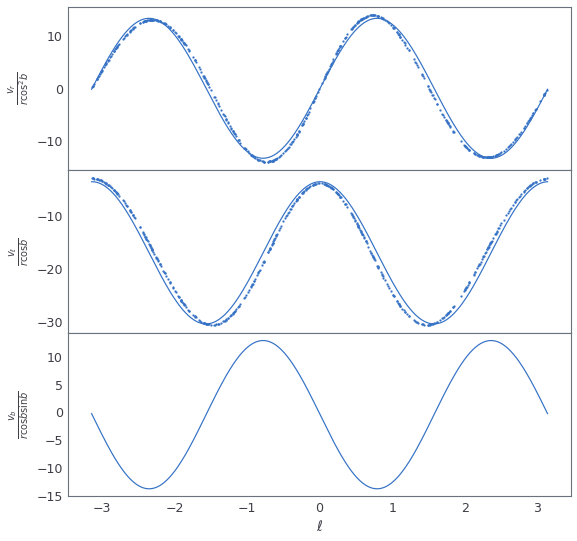

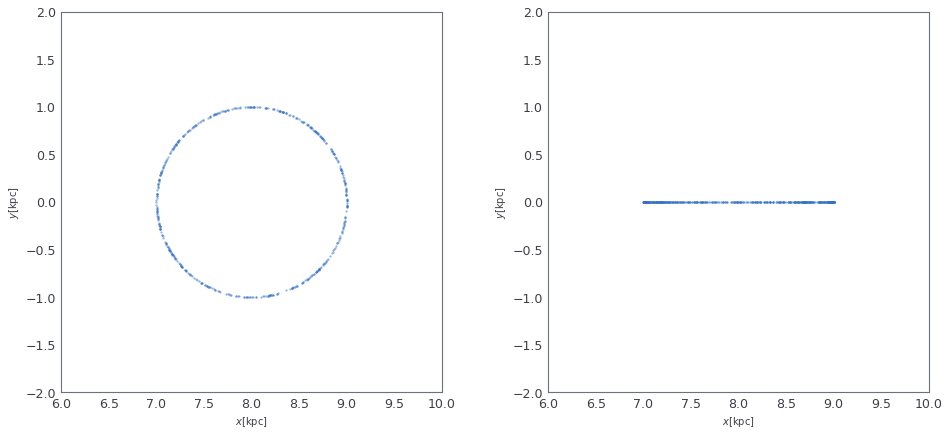

100%|██████████| 500/500 [03:21<00:00,  2.49it/s]


[A, B, C, D]: [13.35927450015388, -16.01955726612045, -0.2134572508337094, 0.058056483180862435]


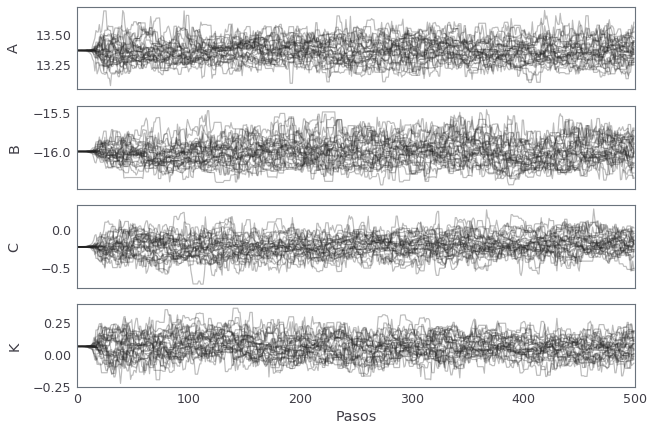

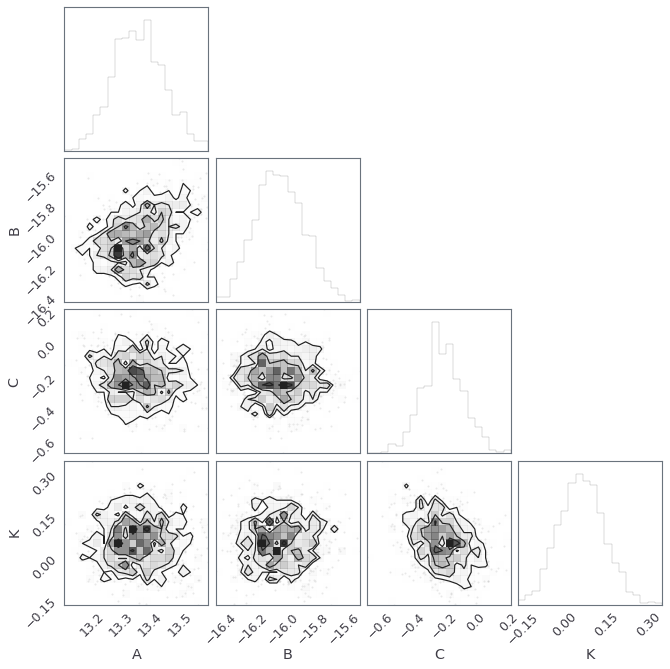

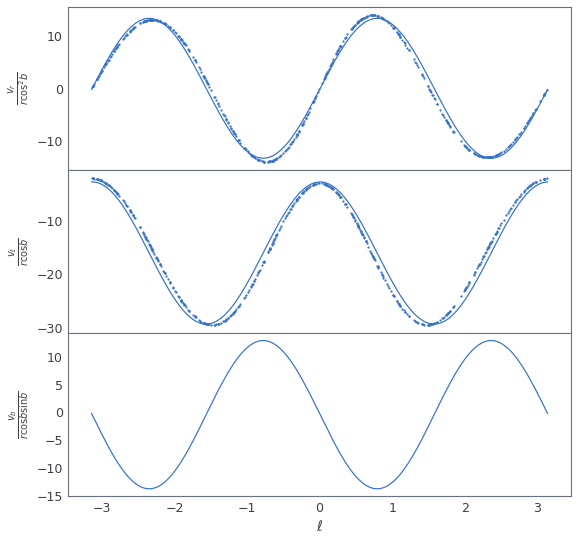

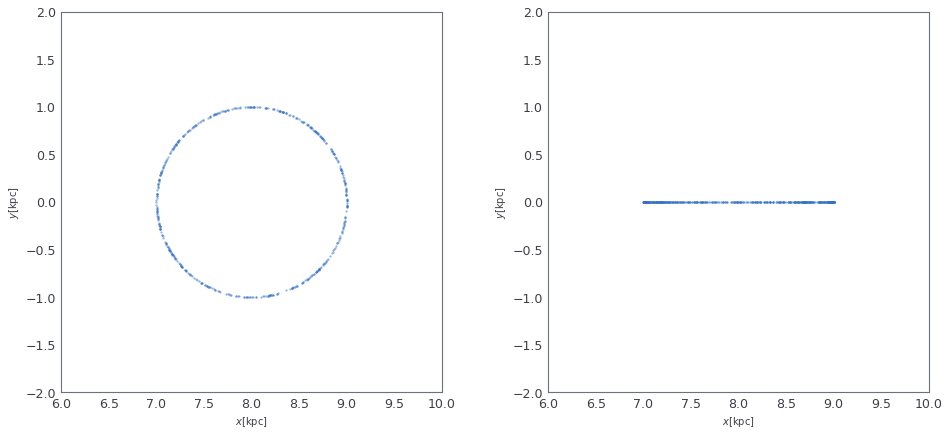

100%|██████████| 500/500 [03:22<00:00,  2.49it/s]


[A, B, C, D]: [13.360243025459477, -15.019687188835174, -0.20515887189693793, 0.05329109424103386]


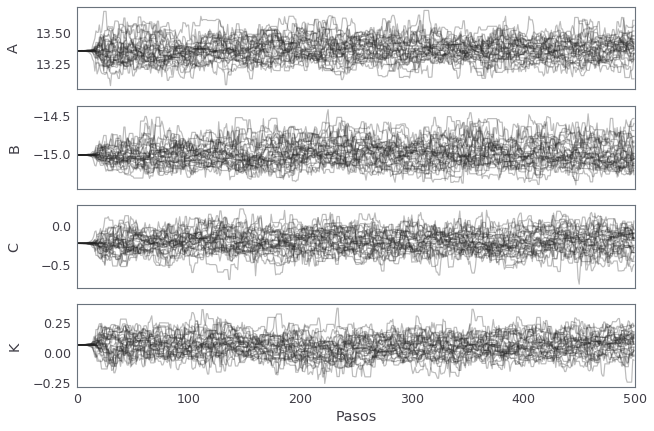

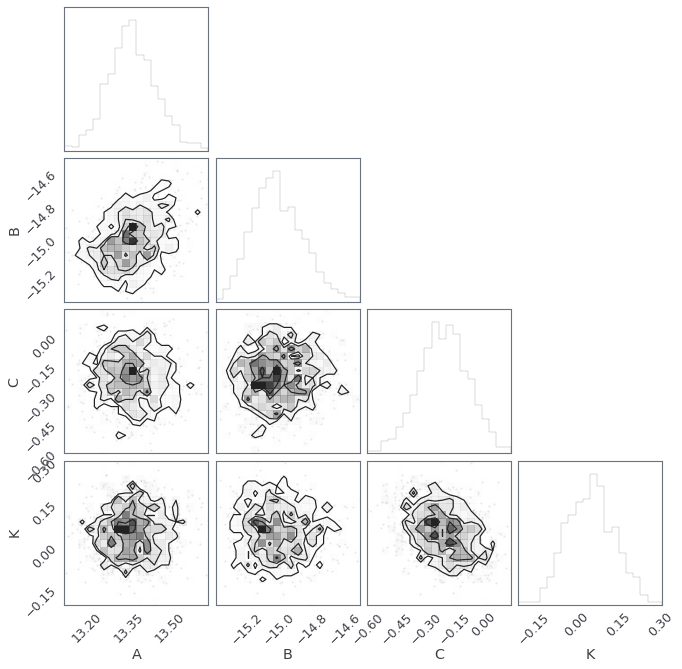

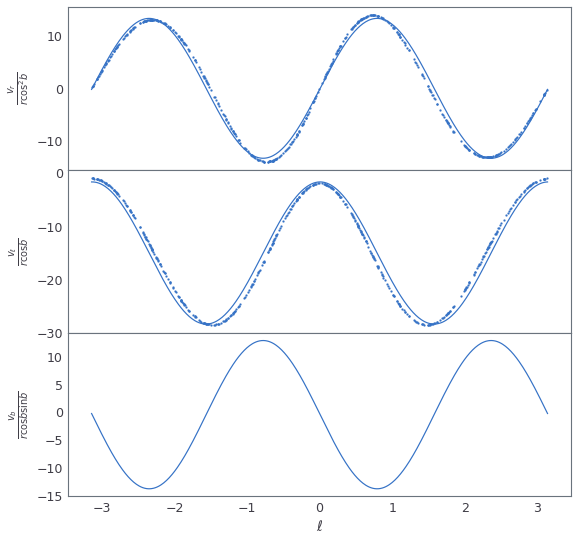

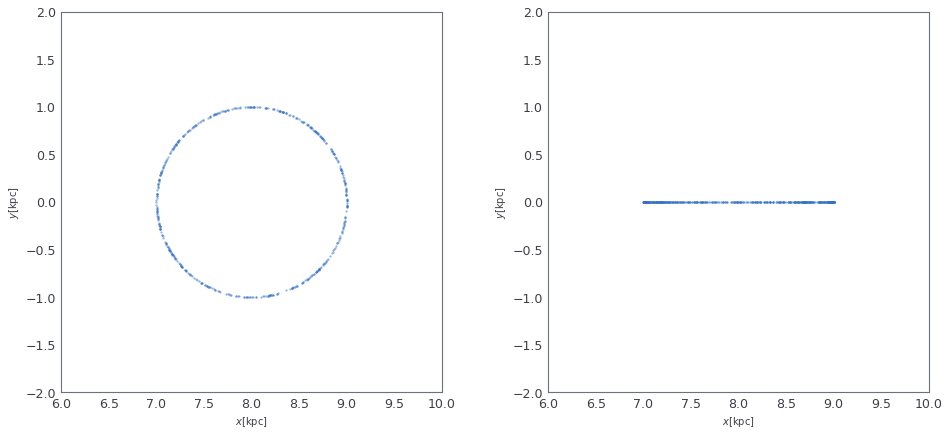

100%|██████████| 500/500 [03:26<00:00,  2.38it/s]


[A, B, C, D]: [13.338154052160533, -13.915507124451608, -0.16132190835709403, 0.0603807655362706]


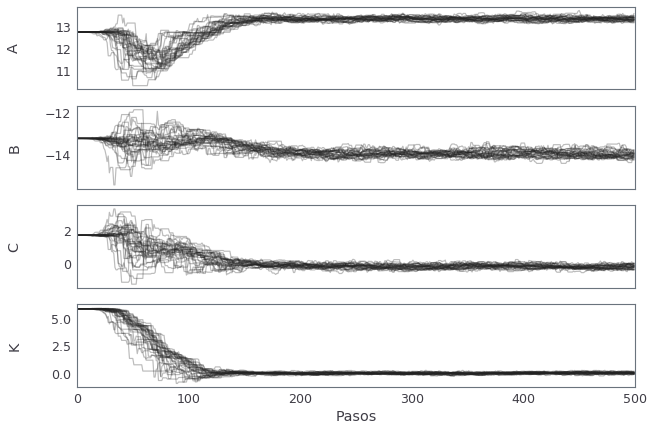

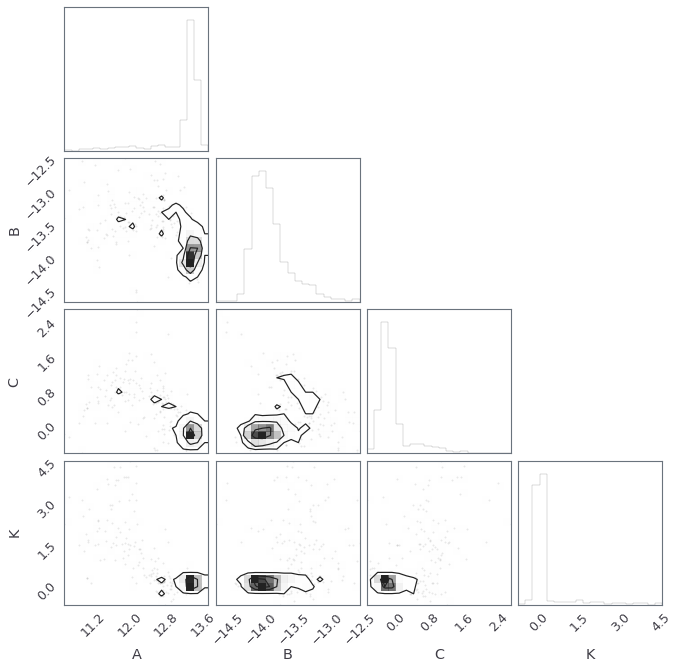

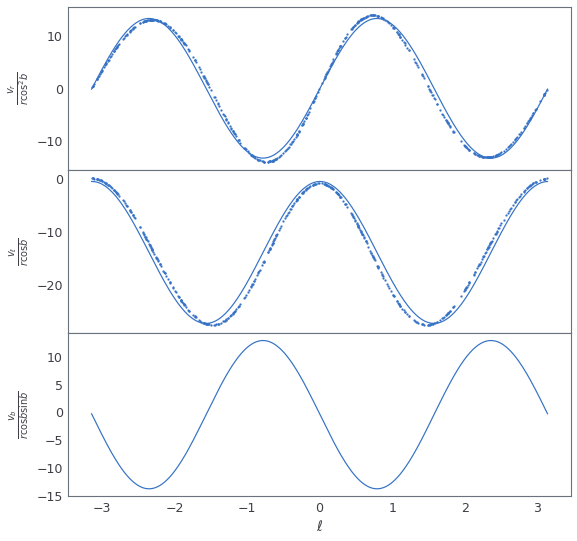

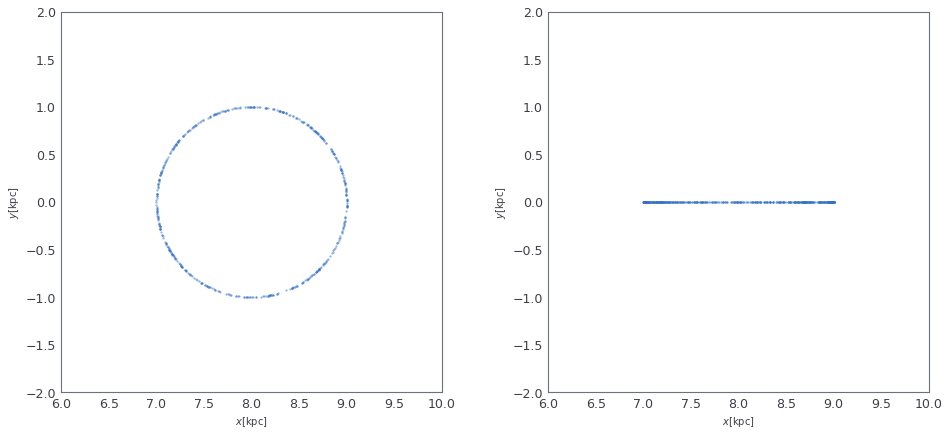

100%|██████████| 500/500 [03:24<00:00,  2.45it/s]


[A, B, C, D]: [13.37479026238548, -12.889811536468565, -0.19254852954114593, 0.10285454884531547]


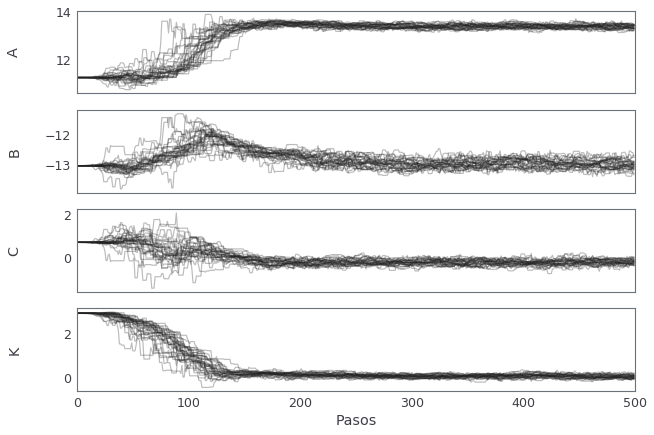

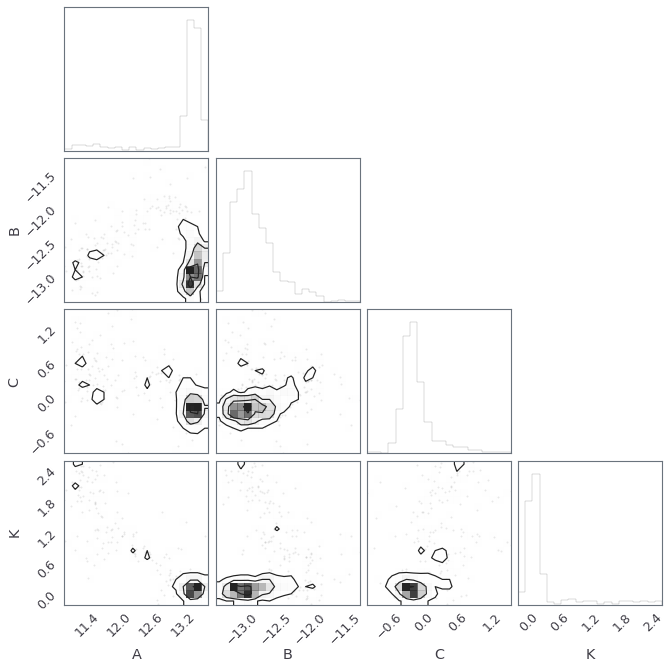

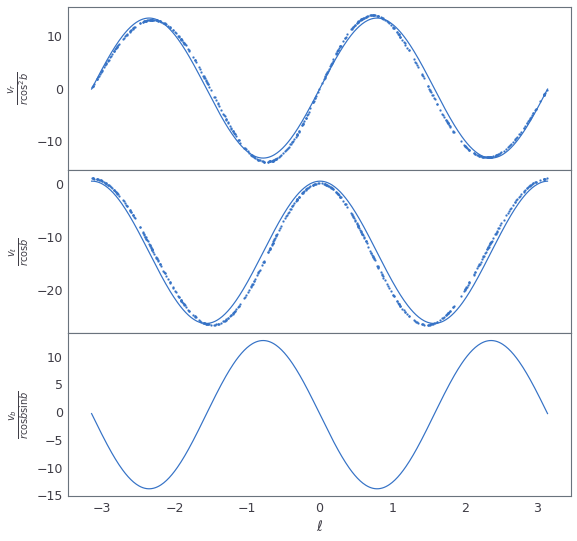

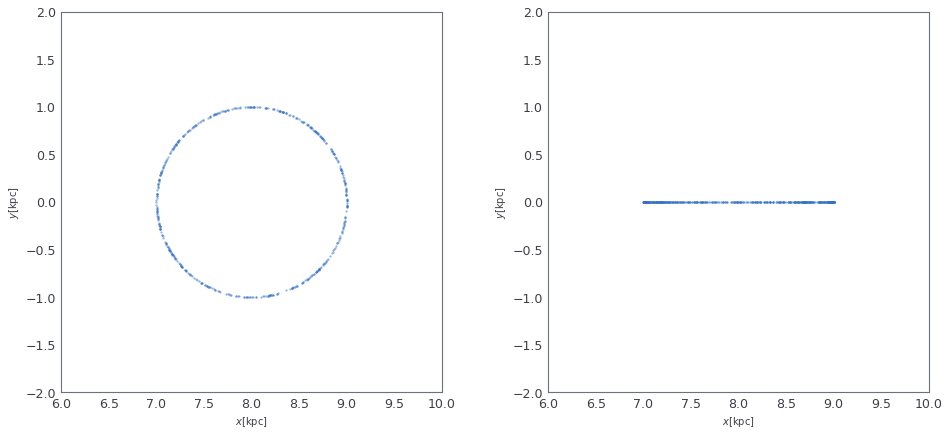

100%|██████████| 500/500 [03:24<00:00,  2.45it/s]


[A, B, C, D]: [13.3675243261618, -12.007543885131032, -0.21576522766141848, 0.0663594011251622]


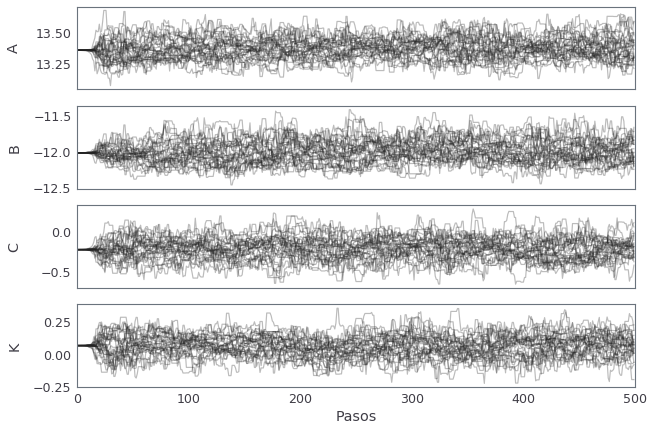

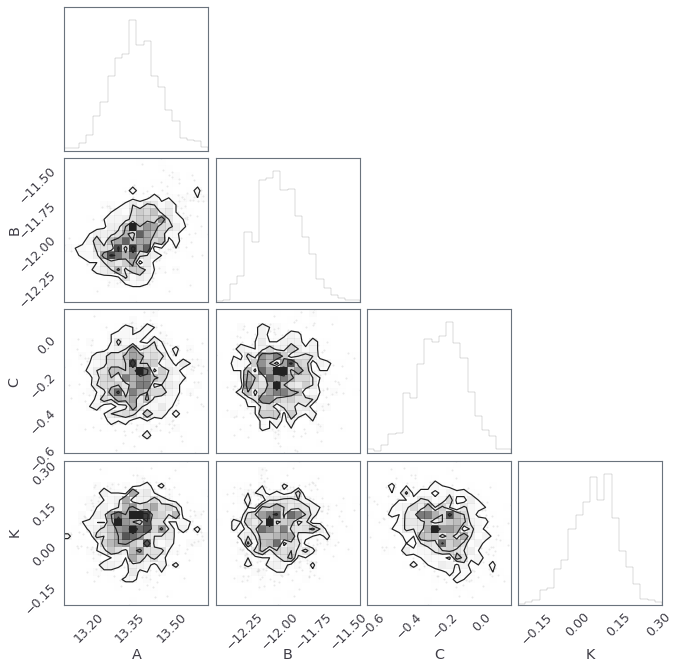

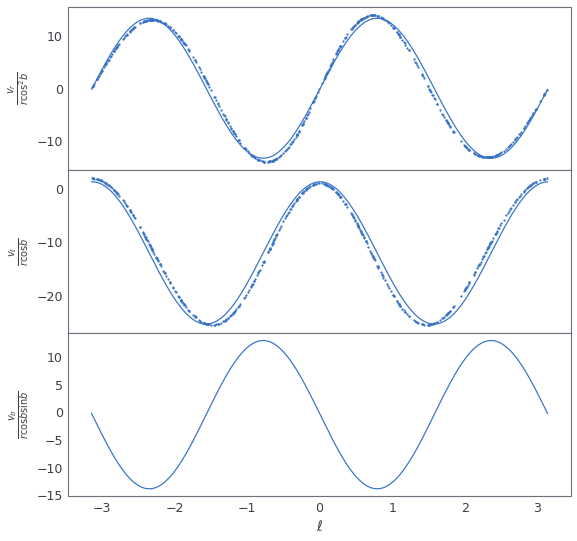

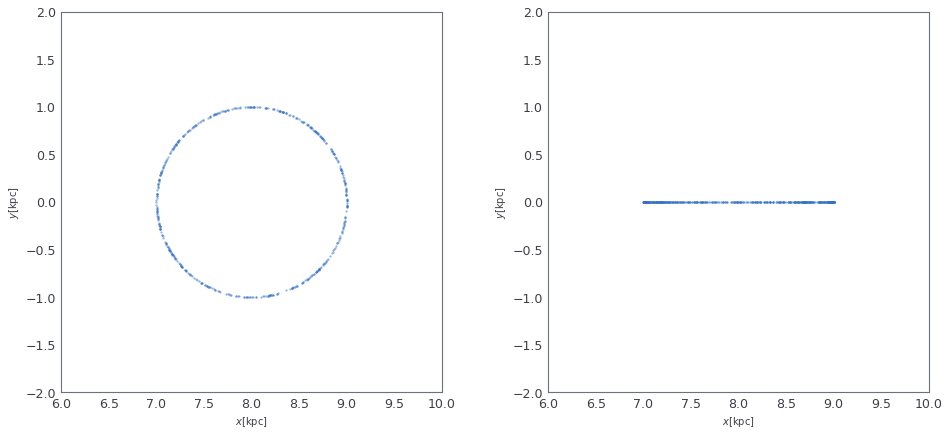

100%|██████████| 500/500 [03:25<00:00,  2.33it/s]


[A, B, C, D]: [13.374347090577928, -10.993265993752166, -0.21331197867922186, 0.0627137808302612]


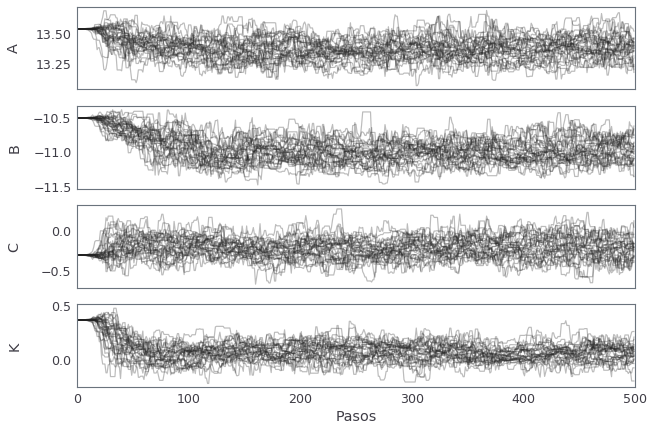

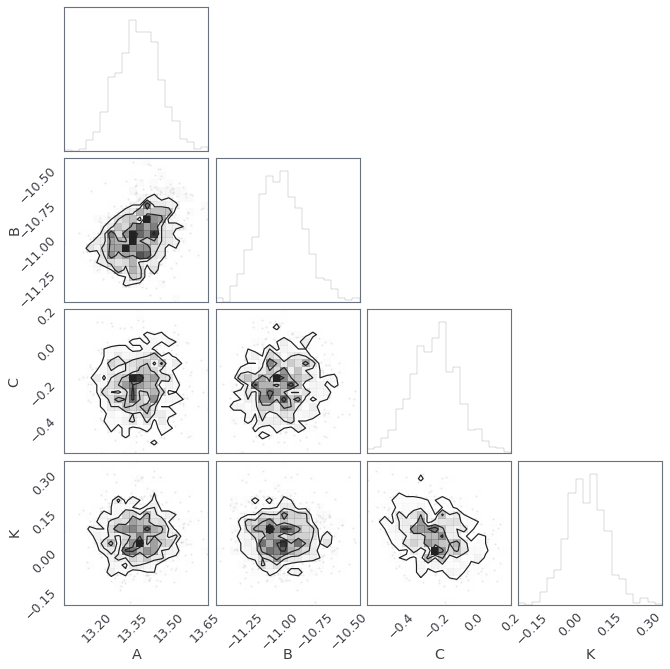

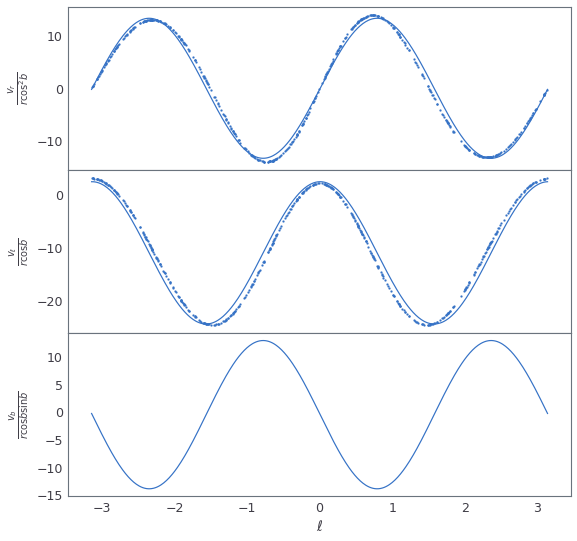

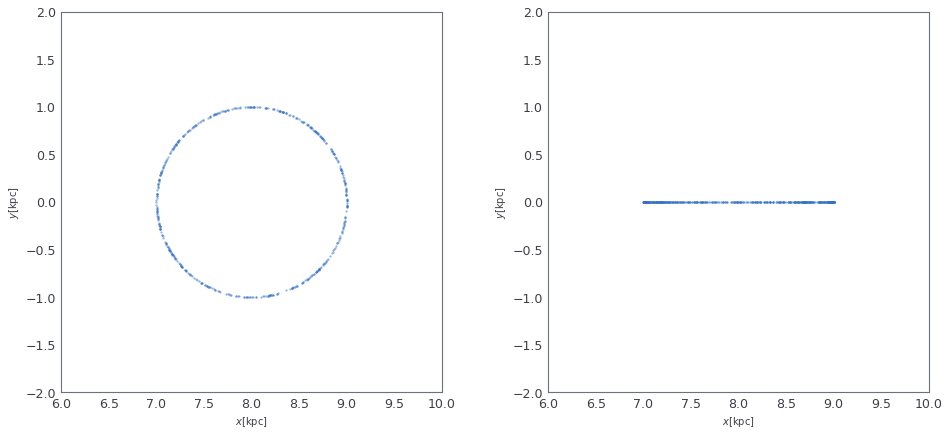

100%|██████████| 500/500 [03:36<00:00,  2.30it/s]


[A, B, C, D]: [13.357147136633383, -10.032187246188023, -0.20594072855116008, 0.05418381940458175]


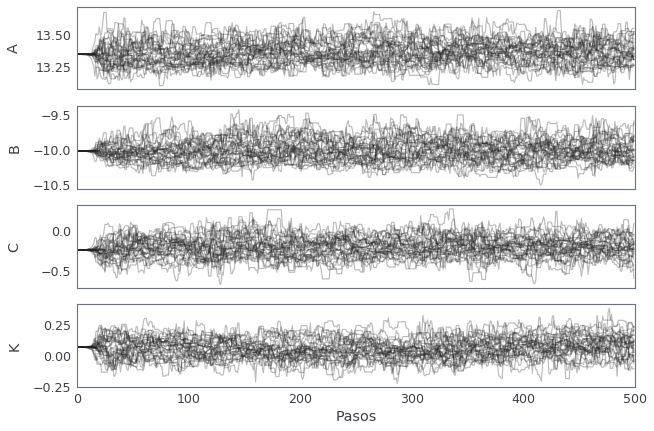

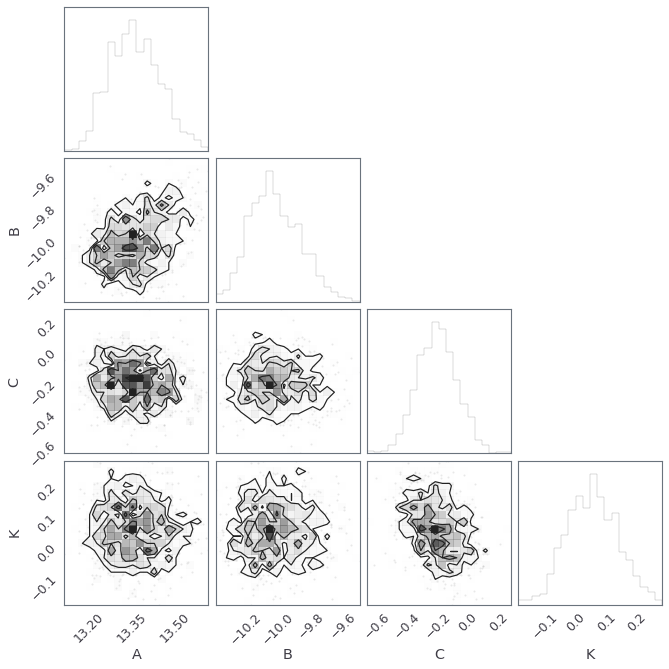

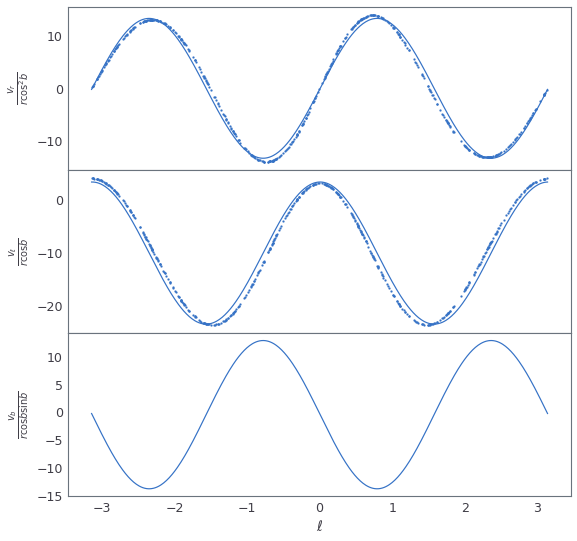

In [28]:
ok = [rut_rot(v,Npart=500,inc=0.) for v in np.linspace(-4,4,9)]

In [116]:
tthetas = np.array([o[7] for o in ok])

<ErrorbarContainer object of 3 artists>

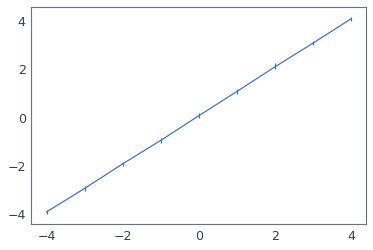

In [149]:
ic = 3
plt.errorbar(np.linspace(-4,4,9),tthetas.T[ic],yerr=[np.array([o[6] for o in ok]).T[0][ic],np.array([o[6] for o in ok]).T[1][ic]])

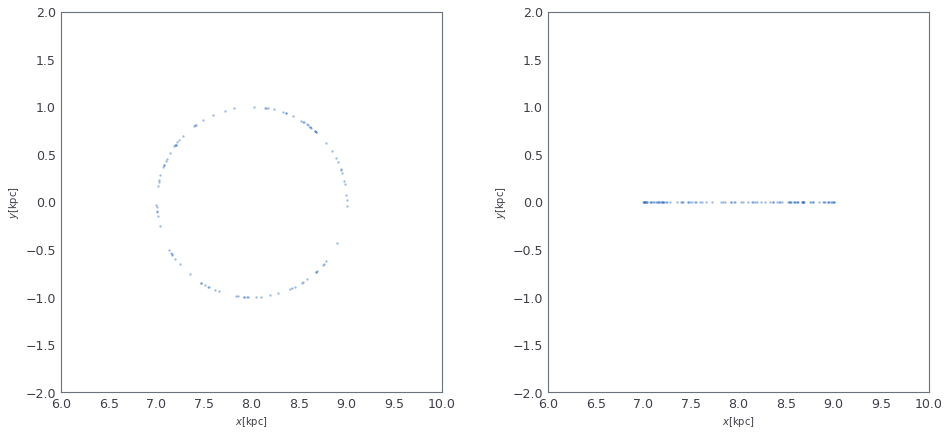

100%|██████████| 500/500 [00:44<00:00, 11.40it/s]


[A, B, C, D]: [13.383594448565953, -13.686080125742231, -0.4490826928576308, -0.14041623799342456]


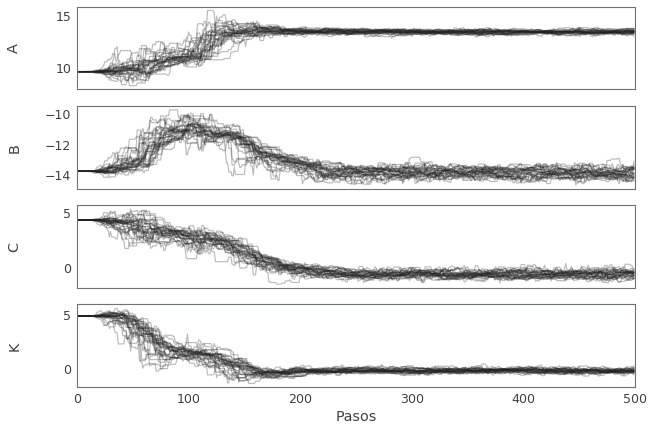

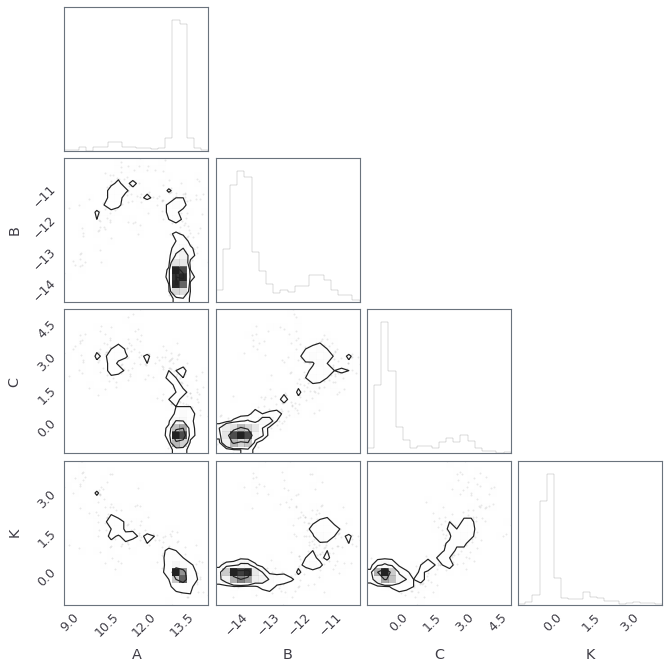

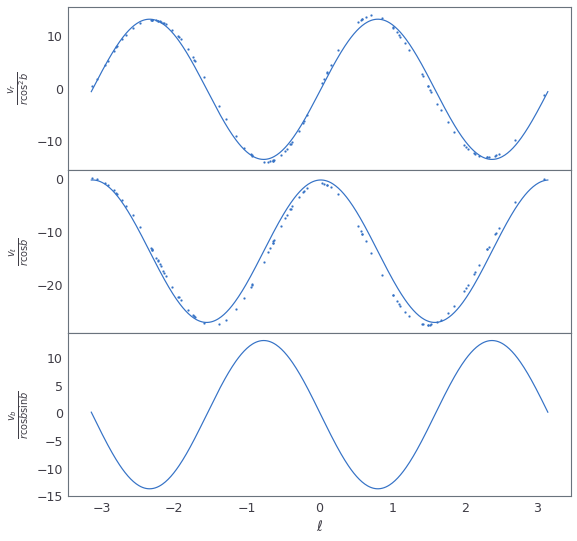

In [39]:
prue = rut_rot(0,inc=0.,Npart=100,Ncam=1500)

In [41]:
ll = np.linspace(-np.pi,np.pi,500)
Mprue = Rot_mat(.17,[0,2,0])
xyzprue = (np.array([Mprue.dot(c) for c in np.array([np.cos(ll), np.sin(ll), np.zeros(len(ll))]).T])+np.array([8.,0.,0.])).T

In [42]:
rlbprue = np.array([cart2galactic(c,np.array([8.,0.,0.])) for c in xyzprue.T])
theta_f = prue[7]

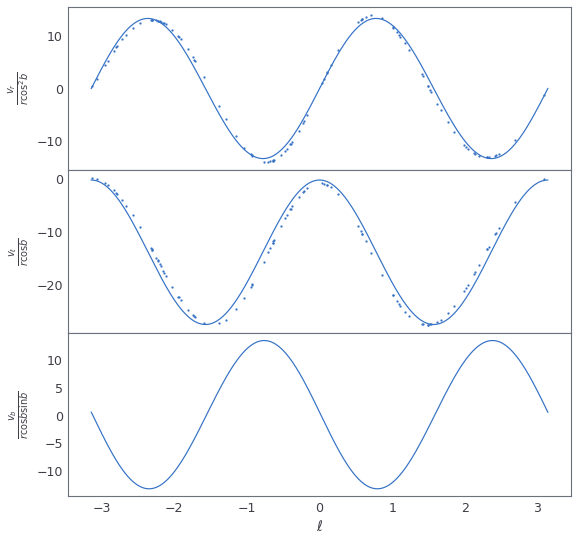

In [45]:


fig, axs = plt.subplots(3, 1, sharex=True,figsize=(9,9))
fig.subplots_adjust(hspace=0)

#axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
#axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(.35) for c in [np.array([1.,l,.35]) for l in ll]])
axs[1].plot(ll,[vell_model(c,[theta_f[0],theta_f[1],0,0])/1./np.cos(0.17) for c in rlbprue])
axs[1].scatter([c[1] for c in prue[2]],[prue[3][i][1]/prue[2][i][0]/np.cos(prue[2][i][2]) for i in range(len(prue[3]))],s=4)

axs[2].plot(ll,[(vb_model(c,theta_f)-mvz1(np.sin(c[2]))*np.cos(c[2]))/1./np.cos(c[2])/np.sin(c[2]) for c in rlbprue])
axs[2].scatter([c[1] for c in prue[2]],[prue[3][i][2]/prue[2][i][0]/np.sin(prue[2][i][2])/np.cos(prue[2][i][2]) for i in range(len(prue[2]))],s=4)


axs[0].plot(ll,[(vr_model(c,[theta_f[0],theta_f[1],0,0])-mvz1(np.sin(c[2]))*np.sin(c[2]))/1./np.cos(c[2])/np.cos(c[2]) for c in rlbprue])
axs[0].scatter([c[1] for c in prue[2]],[prue[3][i][0]/prue[2][i][0]/np.cos(prue[2][i][2])/np.cos(prue[2][i][2]) for i in range(len(prue[2]))],s=4)


#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[0].set_ylim(-1, 1)

plt.xlabel(r'$\ell$',fontsize=14)
axs[0].set_ylabel(r'$\frac{v_{r}}{r\cos^2{b}}$',fontsize=14)
axs[1].set_ylabel(r'$\frac{v_{\ell}}{r\cos{b}}$',fontsize=14)
axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=14)
plt.show()

In [102]:
theta_f

[13.415764008281311,
 -14.111962281961695,
 -0.3618868851441869,
 3.9409715994896084]

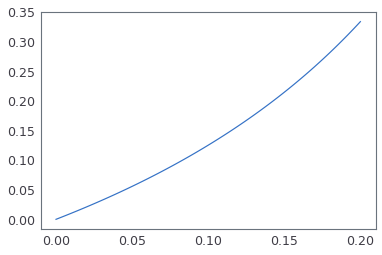

In [38]:
plt.plot(np.linspace(0,.2,100),[x/(1.-2*x) for x in np.linspace(0,.2,100)])
#plt.ylim(-10,10)

In [150]:
def rut_est(r=1.,r_LSR=[8.,0.,0.],Npart=1000, Ncam=2000, rc = 8.0):
    r_LSR = np.array(r_LSR)
    rc = rc
    m3 = ((m1_coord(Npart,r).T)+r_LSR).T
    vv = m1_vels(m3,mvz1).T
    cc = m3.T

    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(cc.T[0],\
               cc.T[1],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)

    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(cc.T[0],\
               cc.T[2],\
               s=4, alpha=.5)
    ax.set_xlabel(r'$x \mathrm{[kpc]}$',fontsize=10)
    ax.set_ylabel(r'$y \mathrm{[kpc]}$',fontsize=10)
    #ax.set_zlabel(r'$z \mathrm{[kpc]}$',fontsize=10)
    ax.set_aspect('equal')
    ax.set_xlim(6,10)
    #ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    #ax.set_zlim(-2,2)
    plt.show()

    
    v_LSR = mt.vel_circ(r_LSR,mt.force_T,)*mt.C.kpc.express(mt.C.km)

    vvkm = vv*mt.C.kpc.express(mt.C.km)
    
    #vvkm = [v+np.array([1,1])*v_exp for v in vvkm]
    
    vv_galac = np.array([vcart2vgalactic(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([cart2galactic(c,r_LSR) for c in cc])

    np.random.seed(42)
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([0.,0.,0.,0.])
    soln = minimize(nll, initial,method = 'Nelder-Mead', args=(cc_galac, vv_galac))

    pos = soln.x + 1e-4 * np.random.randn(30, 4)
    nwalkers, ndim = pos.shape

    sampler = mc.EnsembleSampler(nwalkers, ndim, log_probability, args=(cc_galac, vv_galac))
    sampler.run_mcmc(pos, Ncam,progress=True);

    fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["A", "B", "C",'K']
    for i in range(4):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("Pasos");

    flat_samples = sampler.get_chain(discard=10, thin=15, flat=True)

    fig = corner.corner(
        flat_samples,  labels=labels
    );

    mcmc = [np.percentile(flat_samples[:, i], [16, 50, 84]) for i in range(ndim)]
    qq = [np.diff(mcmc[i]) for i in range(ndim)]
    theta_f = [par[1] for par in mcmc]

    print "[A, B, C, D]:",theta_f 

    ll = np.linspace(-np.pi,np.pi,500)

    fig, axs = plt.subplots(3, 1, sharex=True,figsize=(9,9))
    fig.subplots_adjust(hspace=0)

    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
    #axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(.35) for c in [np.array([1.,l,.35]) for l in ll]])
    axs[1].plot(ll,[vell_model(c,theta_f) for c in [np.array([1.,l,0.]) for l in ll]])
    axs[1].scatter([c[1] for c in cc_galac],[vv_galac[i][1]/cc_galac[i][0]/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[2].plot(ll,[vb_model(c,theta_f) for c in [np.array([1.,l,.0]) for l in ll]])
    axs[2].scatter([c[1] for c in cc_galac],[vv_galac[i][2]/cc_galac[i][0]/np.sin(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)

    axs[0].plot(ll,[vr_model(c,theta_f) for c in [np.array([1.,l,0.]) for l in ll]])
    axs[0].scatter([c[1] for c in cc_galac],[vv_galac[i][0]/cc_galac[i][0]/np.cos(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)


    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    plt.xlabel(r'$\ell$',fontsize=14)
    axs[0].set_ylabel(r'$\frac{v_{r}}{r\cos^2{b}}$',fontsize=14)
    axs[1].set_ylabel(r'$\frac{v_{\ell}}{r\cos{b}}$',fontsize=14)
    axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=14)
    plt.show()

    return cc, vv, cc_galac, vv_galac, soln, mcmc, qq, theta_f, sampler

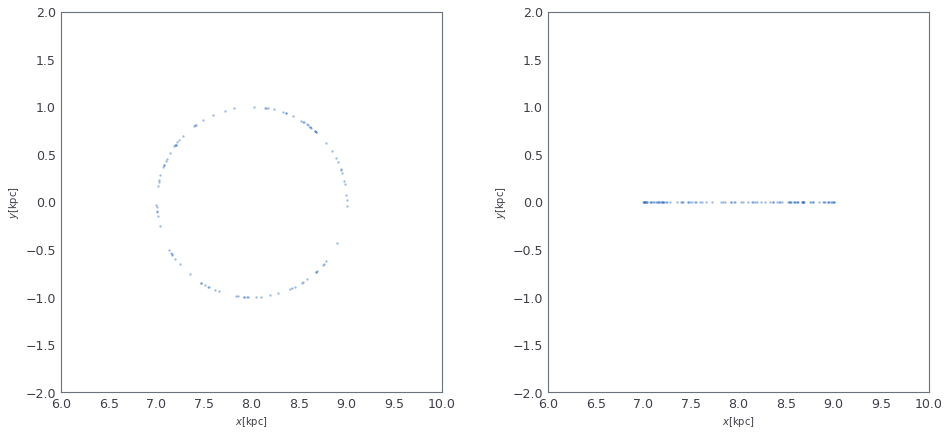

100%|██████████| 800/800 [01:09<00:00, 11.56it/s]


[A, B, C, D]: [13.391733183120204, -13.79273405235675, -0.5345713417517464, -0.13143719560043005]


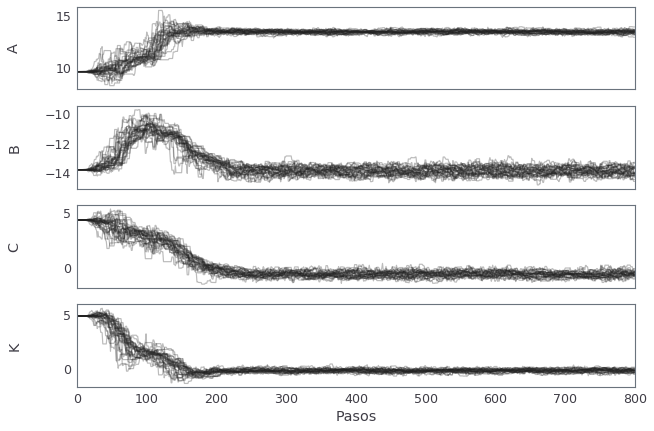

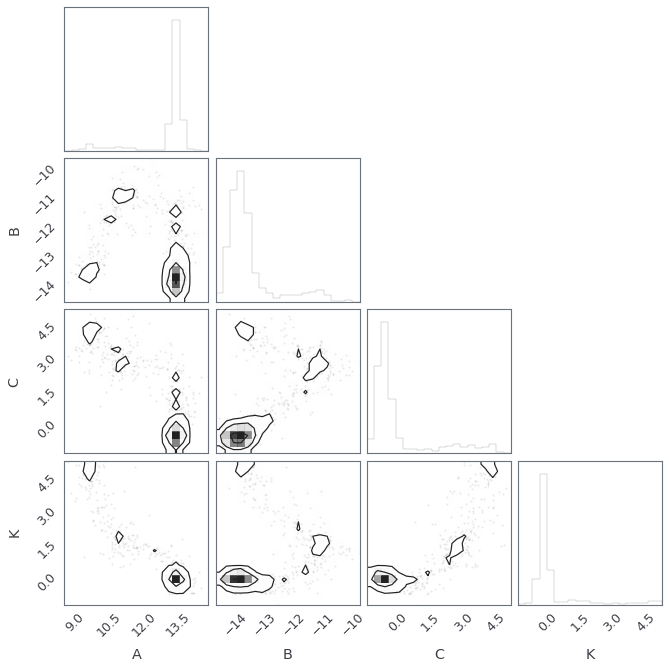

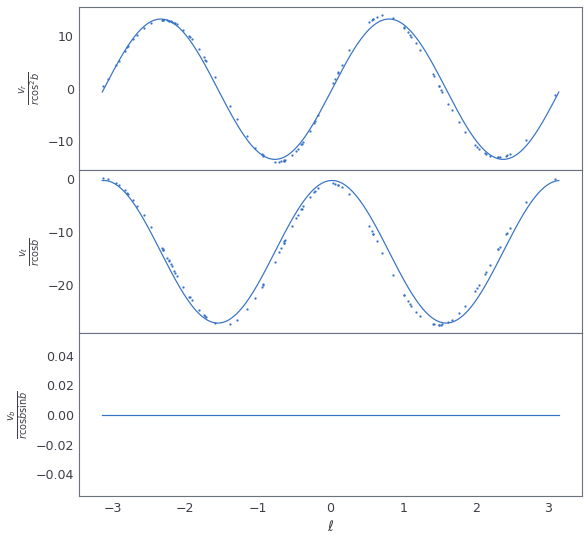

In [152]:
pruesta = rut_est(Npart=100,Ncam=800)

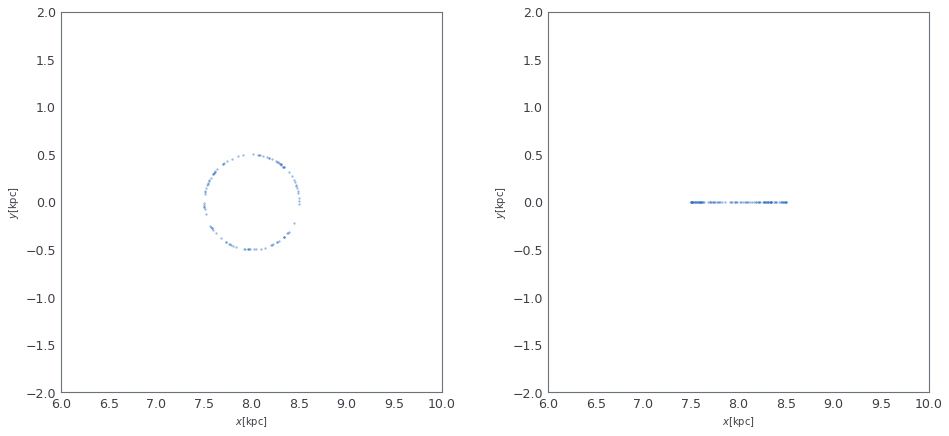

100%|██████████| 800/800 [01:08<00:00, 11.67it/s]


[A, B, C, D]: [13.500358074878642, -13.878209096267613, -0.22752794335180399, -0.08174011261958111]


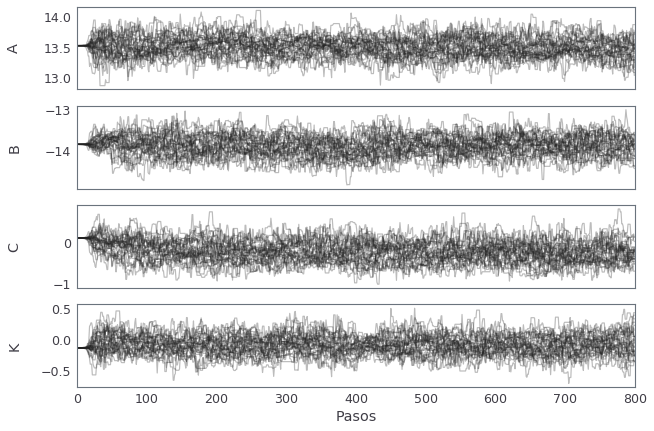

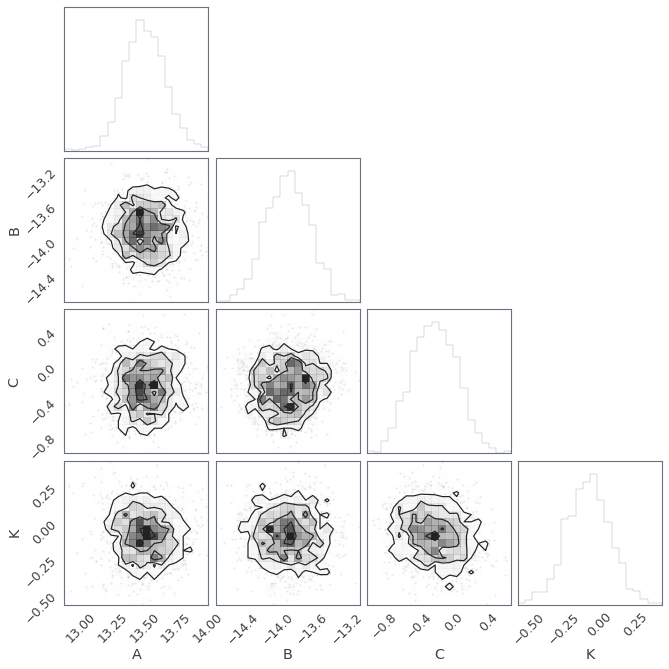

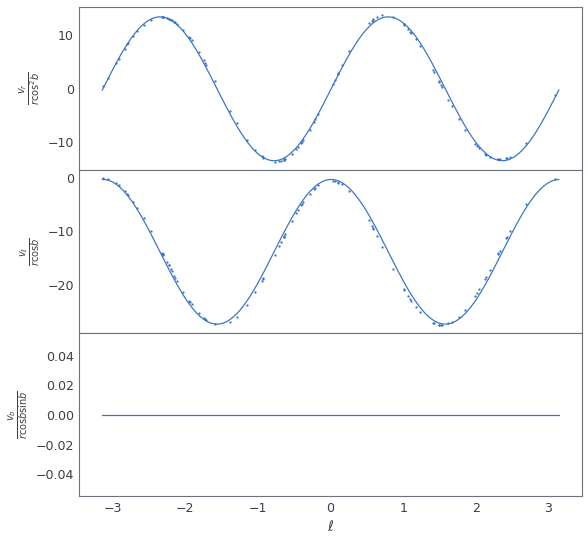

In [153]:
pruesta = rut_est(r=.5,Npart=100,Ncam=800)

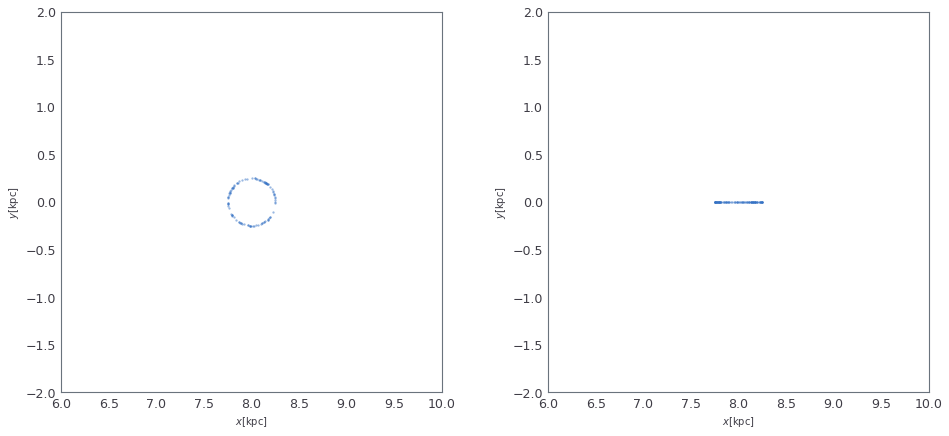

100%|██████████| 800/800 [01:14<00:00, 11.25it/s]


[A, B, C, D]: [13.539634467580873, -13.971304950898736, -0.15214143372991917, -0.060507500653973464]


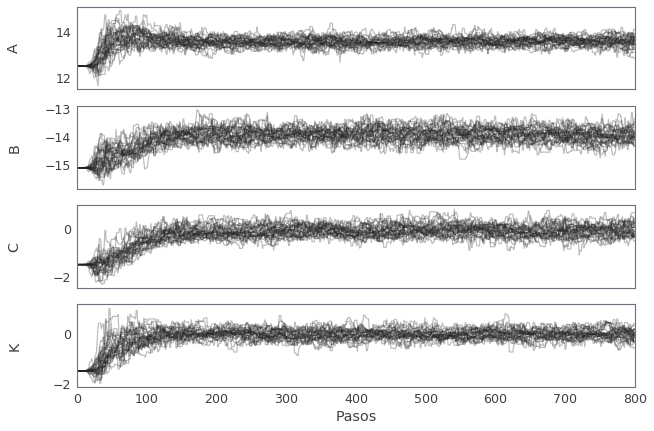

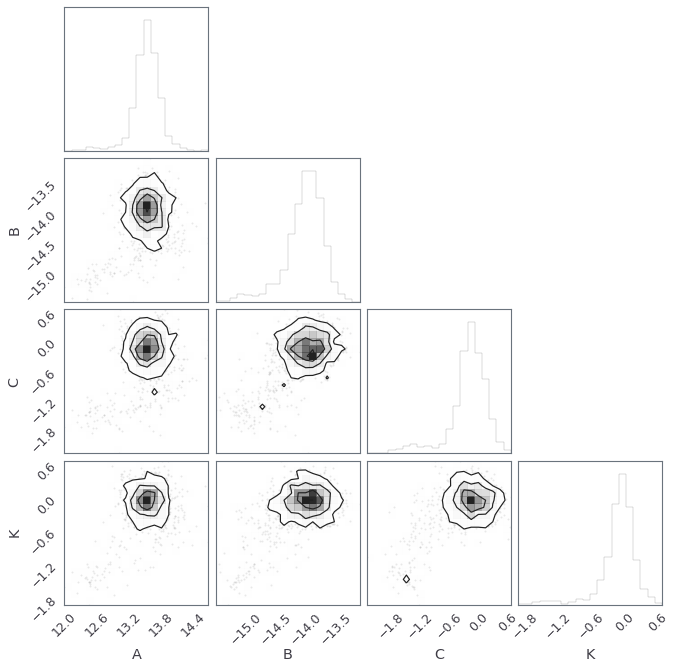

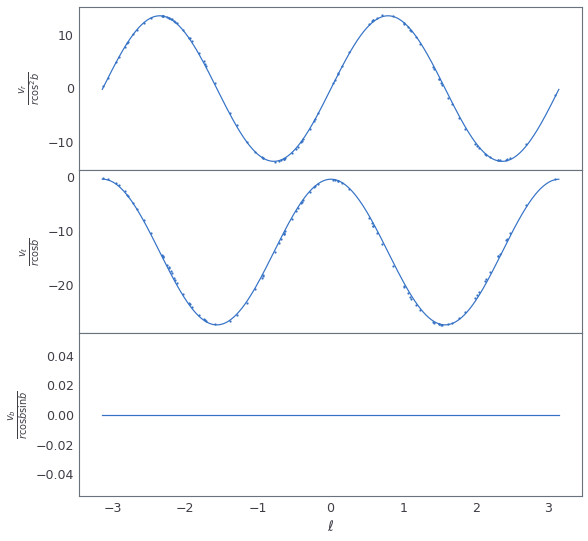

In [154]:
pruesta = rut_est(r=.25,Npart=100,Ncam=800)

In [53]:
theta_f = pruesta[7]

In [66]:
np.array(pruesta[6]).T[0].T-np.array(pruesta[7])

array([-13.30501401,  14.21395519,   0.2091331 ,   0.09655541])

In [65]:
pruesta[6],pruesta[7]

([array([0.0552844, 0.0670297]),
  array([0.10307987, 0.12710598]),
  array([0.09651139, 0.10306052]),
  array([0.06428214, 0.06073808])],
 [13.360298411291321,
  -14.110875320113355,
  -0.112621704088913,
  -0.03227327244817735])

In [55]:
prue = pruesta

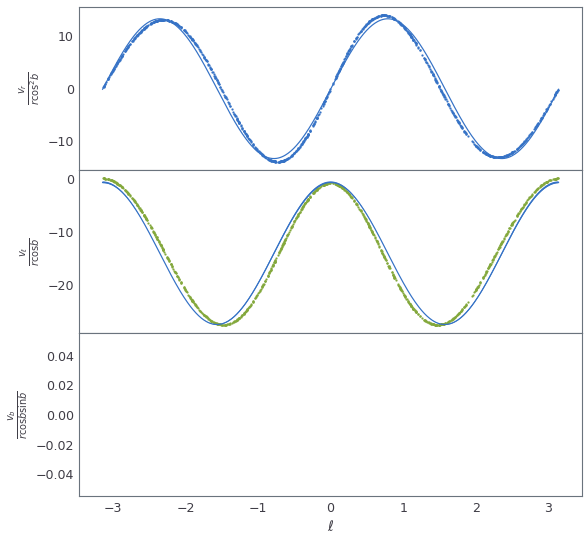

In [110]:
fig, axs = plt.subplots(3, 1, sharex=True,figsize=(9,9))
fig.subplots_adjust(hspace=0)

#axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(0.17) for c in [np.array([1.,l,0.17]) for l in ll]])
#axs[0].plot(ll,[vell_model(c,[15.1,-11.8,-9.2,-2.5])/1./np.cos(.35) for c in [np.array([1.,l,.35]) for l in ll]])

axs[1].plot(ll,[vell_model(c,theta_f)/1./np.cos(0.) for c in [np.array([1.,l,0.]) for l in ll]])
axs[1].fill_between(ll,[vell_model(c,-np.array(pruesta[6]).T[0].T+np.array(pruesta[7])) for c in [np.array([1.,l,0.]) for l in ll]],[vell_model(c,np.array(pruesta[6]).T[1].T+np.array(pruesta[7]))/1./np.cos(0.) for c in [np.array([1.,l,0.]) for l in ll]] ) 
axs[1].scatter([c[1] for c in prue[2]],[prue[3][i][1]/prue[2][i][0]/np.cos(prue[2][i][2]) for i in range(len(prue[3]))],s=4)

axs[2].plot(ll,[(vb_model(c,theta_f)-mvz1(np.sin(c[2]))*np.cos(c[2]))/1./np.cos(c[2])/np.sin(c[2]) for c in [np.array([1.,l,0.]) for l in ll]])
axs[2].scatter([c[1] for c in prue[2]],[prue[3][i][2]/prue[2][i][0]/np.sin(prue[2][i][2])/np.cos(prue[2][i][2]) for i in range(len(prue[2]))],s=4)


axs[0].plot(ll,[(vr_model(c,theta_f)-mvz1(np.sin(c[2]))*np.sin(c[2]))/1./np.cos(c[2])/np.cos(c[2]) for c in [np.array([1.,l,0.]) for l in ll]])
axs[0].scatter([c[1] for c in prue[2]],[prue[3][i][0]/prue[2][i][0]/np.cos(prue[2][i][2])/np.cos(prue[2][i][2]) for i in range(len(prue[2]))],s=4)


#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[0].set_ylim(-1, 1)

plt.xlabel(r'$\ell$',fontsize=14)
axs[0].set_ylabel(r'$\frac{v_{r}}{r\cos^2{b}}$',fontsize=14)
axs[1].set_ylabel(r'$\frac{v_{\ell}}{r\cos{b}}$',fontsize=14)
axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=14)
plt.show()

In [81]:
np.where(pruesta[3].T[1]==np.max(pruesta[3].T[1]))

(array([117]),)

In [123]:
(mt.vel_circ([8.,0.,0.],mt.force_T)*mt.C.kpc.express(mt.C.km))[1]*np.cos(pruesta[2][117][1])

219.90403508470473

In [140]:
pruesta[5][1][1]+np.cos(2.*pruesta[2][117][1])*pruesta[5][0][1],\
pruesta[5][1][0]+np.cos(2.*pruesta[2][117][1])*pruesta[5][0][0],\
pruesta[5][1][2]+np.cos(2.*pruesta[2][117][1])*pruesta[5][0][2],\
pruesta[5][1][0]+np.cos(2.*pruesta[2][117][1])*pruesta[5][0][2],\
pruesta[5][1][2]+np.cos(2.*pruesta[2][117][1])*pruesta[5][0][0],\

(-0.7530021781681739,
 -0.9113564093620354,
 -0.5588786625807725,
 -0.7890645122754734,
 -0.6811705596673345)

In [137]:
pruesta[5],pruesta[6],pruesta[7]

([array([13.30501401, 13.36029841, 13.42732811]),
  array([-14.21395519, -14.11087532, -13.98376934]),
  array([-0.2091331 , -0.1126217 , -0.00956118]),
  array([-0.09655541, -0.03227327,  0.02846481])],
 [array([0.0552844, 0.0670297]),
  array([0.10307987, 0.12710598]),
  array([0.09651139, 0.10306052]),
  array([0.06428214, 0.06073808])],
 [13.360298411291321,
  -14.110875320113355,
  -0.112621704088913,
  -0.03227327244817735])

In [116]:
pruesta[0][117],pruesta[2][117],pruesta[1][117]*mt.C.kpc.express(mt.C.km),pruesta[3][117]

(array([8.99995462, 0.00952702, 0.        ]),
 array([ 1.        , -3.13206549,  0.        ]),
 array([   0.23278644, -219.90802458,    0.        ]),
 array([0.23283295, 0.00377284, 0.        ]))

In [100]:
vcart2vgalactic(np.array([8.+pruesta[2][117][0]*np.cos(pruesta[2][117][1]),pruesta[2][117][0]*np.sin(pruesta[2][117][1]),0.]),\
                np.array([8.,0.,0.]),\
                mt.vel_circ([8.+pruesta[2][117][0]*np.cos(pruesta[2][117][1]),pruesta[2][117][0]*np.sin(pruesta[2][117][1]),0.],\ 
                mt.force_T)*mt.C.kpc.express(mt.C.km),mt.vel_circ([8.,0.,0.],mt.force_T)*mt.C.kpc.express(mt.C.km)) 

array([ 0.2892962 , -0.92048802,  0.        ])

In [79]:
np.max(pruesta[3].T[1])

0.003772840368007224

In [71]:
pruesta[6],pruesta[7]

([array([0.0552844, 0.0670297]),
  array([0.10307987, 0.12710598]),
  array([0.09651139, 0.10306052]),
  array([0.06428214, 0.06073808])],
 [13.360298411291321,
  -14.110875320113355,
  -0.112621704088913,
  -0.03227327244817735])

In [74]:
pruesta[6][0][0]

0.05528439841589261

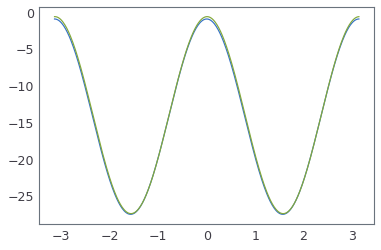

In [75]:
plt.plot(ll,[vell_model(c,np.array(pruesta[7])+np.array([-pruesta[6][0][0],-pruesta[6][1][0],pruesta[6][2][0],0.])) for c in [np.array([1.,l,0.]) for l in ll]])
plt.plot(ll,[vell_model(c,np.array(pruesta[7])+np.array([pruesta[6][0][0],pruesta[6][1][0],-pruesta[6][2][0],0.])) for c in [np.array([1.,l,0.]) for l in ll]]) 

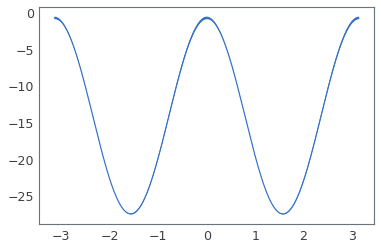

In [69]:
plt.plot(ll,[vell_model(c,theta_f)/1./np.cos(0.) for c in [np.array([1.,l,0.]) for l in ll]])
plt.fill_between(ll,[vell_model(c,-np.array(pruesta[6]).T[0].T+np.array(pruesta[7])) for c in [np.array([1.,l,0.]) for l in ll]],[vell_model(c,np.array(pruesta[6]).T[1].T+np.array(pruesta[7]))/1./np.cos(0.) for c in [np.array([1.,l,0.]) for l in ll]] ) 